<a href="https://colab.research.google.com/github/bruno-albino/exploratory-analysis-ifsp/blob/main/Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Top 8800 Twitch Streamers**


### Top of the best streams based on watch time.

###### Nome: Bruno da Silva Albino CP: 300273X
###### Nome: Eduardo Bueno CP: 300273X
---


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Disciplina: Inteligência Artificial

Professor: Samuel Martins


---



In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# estilos padrão para os plots/visualizações
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

### **1. Dataset**
----
Dataset: Top 8800 Twitch Streamers: https://www.kaggle.com/girlazo/top-8800-twitch-*streamers*

Este dataset possui 8800 linhas, listando os melhores streamers do mundo na plataforma de stream Twitch, baseado em tempo assistido pelos usuários. Cada registro possui o nome do streamer, a quantidaded de vies e assinantes do canal, e outras informações como os três jogos mais jogados de cada streamer




#### **1.1 Importando o Dataset**

In [4]:
data = pd.read_csv('/content/drive/MyDrive/TwitchDataSetProcessado.csv')

In [5]:
data.head()

,topCount,screenName,watchTime,streamTime,peakViewers,averageViewers,followers,followersGained,viewsGained,mature,language,firstCategory,secondCategory,thirdCategory
0,1,xQcOW,7333609065,215670,222720,32913,3691010,2051895,109735389,False,English,Just Chatting,Among Us,Overwatch
1,2,Gaules,6314532585,515595,387315,12254,1966465,1141123,112807468,True,Portuguese,Counter-Strike: Global Offensive,Among Us,PLAYERUNKNOWN
2,3,summit1g,6235007490,216000,310998,25931,5374710,1402547,91501875,False,English,Escape From Tarkov,Sea of Thieves,Grand Theft Auto V
3,5,NICKMERCS,3853252845,131880,163241,29183,4415637,1337535,49164651,False,English,Call Of Duty: Modern Warfare,Fortnite,Halo: The Master Chief Collection
4,6,Fextralife,3644124975,161595,68795,19768,533400,437036,684835748,False,English,VALORANT,The Elder Scrolls Online,Genshin Impact


In [6]:
data.info

<bound method DataFrame.info of       topCount  ...                      thirdCategory
0            1  ...                          Overwatch
1            2  ...                      PLAYERUNKNOWN
2            3  ...                 Grand Theft Auto V
3            5  ...  Halo: The Master Chief Collection
4            6  ...                     Genshin Impact
...        ...  ...                                ...
8384      8796  ...                       Apex Legends
8385      8797  ...                       Apex Legends
8386      8798  ...       Fall Guys: Ultimate Knockout
8387      8799  ...                              SMITE
8388      8800  ...                          Destiny 2

[8389 rows x 14 columns]>

#### **1.2 Informações básicas do dataset**

In [7]:
print(f'O dataset possui {data.shape[0]} exemplos/observações/amostras/linhas e {data.shape[1]} atributos/características/variáveis/colunas')

O dataset possui 8389 exemplos/observações/amostras/linhas e 14 atributos/características/variáveis/colunas


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8389 entries, 0 to 8388
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   topCount         8389 non-null   int64 
 1   screenName       8389 non-null   object
 2   watchTime        8389 non-null   int64 
 3   streamTime       8389 non-null   int64 
 4   peakViewers      8389 non-null   int64 
 5   averageViewers   8389 non-null   int64 
 6   followers        8389 non-null   int64 
 7   followersGained  8389 non-null   int64 
 8   viewsGained      8389 non-null   int64 
 9   mature           8389 non-null   bool  
 10  language         8389 non-null   object
 11  firstCategory    8389 non-null   object
 12  secondCategory   8389 non-null   object
 13  thirdCategory    8389 non-null   object
dtypes: bool(1), int64(8), object(5)
memory usage: 860.3+ KB


**watchTime, followers e viewsGained** são variáveis dependentes e todas as demais são variáveis independentes.

#### **1.3 Estatísticas Descritivas**

In [9]:
data.describe().round(2)

,topCount,watchTime,streamTime,peakViewers,averageViewers,followers,followersGained,viewsGained
count,8389.00,8.389000e+03,8389.00,8389.00,8389.00,8389.00,8389.00,8.389000e+03
mean,4394.24,7.659037e+07,87237.88,9303.67,1099.86,145144.44,60731.00,2.473236e+06
std,2536.45,2.376042e+08,64151.71,25539.45,2893.57,395978.34,163685.48,9.633958e+06
min,1.00,8.827995e+06,150.00,75.00,16.00,119.00,-178570.00,1.982000e+03
25%,2202.00,1.307338e+07,45570.00,1550.00,174.00,23273.00,7692.00,3.619410e+05
50%,4388.00,2.230203e+07,78450.00,3423.00,351.00,53333.00,19513.00,7.697760e+05
75%,6585.00,5.232114e+07,114345.00,8212.00,894.00,132782.00,53467.00,2.103522e+06
max,8800.00,7.333609e+09,521115.00,1016962.00,89278.00,16042584.00,4681567.00,6.848357e+08


#### Convertendo a variável 'Mature' (maduro) em Categórica (apenas para facilitar a análise exploratória) 

In [10]:
data.head()

,topCount,screenName,watchTime,streamTime,peakViewers,averageViewers,followers,followersGained,viewsGained,mature,language,firstCategory,secondCategory,thirdCategory
0,1,xQcOW,7333609065,215670,222720,32913,3691010,2051895,109735389,False,English,Just Chatting,Among Us,Overwatch
1,2,Gaules,6314532585,515595,387315,12254,1966465,1141123,112807468,True,Portuguese,Counter-Strike: Global Offensive,Among Us,PLAYERUNKNOWN
2,3,summit1g,6235007490,216000,310998,25931,5374710,1402547,91501875,False,English,Escape From Tarkov,Sea of Thieves,Grand Theft Auto V
3,5,NICKMERCS,3853252845,131880,163241,29183,4415637,1337535,49164651,False,English,Call Of Duty: Modern Warfare,Fortnite,Halo: The Master Chief Collection
4,6,Fextralife,3644124975,161595,68795,19768,533400,437036,684835748,False,English,VALORANT,The Elder Scrolls Online,Genshin Impact


In [11]:
data.mature.unique()

array([False,  True])

In [12]:
selecao = data.mature == False
data.loc[selecao, 'mature'] = 'Não'
data

,topCount,screenName,watchTime,streamTime,peakViewers,averageViewers,followers,followersGained,viewsGained,mature,language,firstCategory,secondCategory,thirdCategory
0,1,xQcOW,7333609065,215670,222720,32913,3691010,2051895,109735389,Não,English,Just Chatting,Among Us,Overwatch
1,2,Gaules,6314532585,515595,387315,12254,1966465,1141123,112807468,True,Portuguese,Counter-Strike: Global Offensive,Among Us,PLAYERUNKNOWN
2,3,summit1g,6235007490,216000,310998,25931,5374710,1402547,91501875,Não,English,Escape From Tarkov,Sea of Thieves,Grand Theft Auto V
3,5,NICKMERCS,3853252845,131880,163241,29183,4415637,1337535,49164651,Não,English,Call Of Duty: Modern Warfare,Fortnite,Halo: The Master Chief Collection
4,6,Fextralife,3644124975,161595,68795,19768,533400,437036,684835748,Não,English,VALORANT,The Elder Scrolls Online,Genshin Impact
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8384,8796,MARCUSakaAPOSTLE,8830110,72495,2671,75,20896,19618,190090,Não,English,Spellbreak,Rogue Company,Apex Legends
8385,8797,MIMISHKA_MEOW,8829870,96090,2039,89,14805,3204,398018,True,Russian,Overwatch,Just Chatting,Apex Legends
8386,8798,MySteam,8829075,44400,1158,180,11134,10273,264848,Não,Other,Dota 2,Just Chatting,Fall Guys: Ultimate Knockout
8387,8799,Iker_Guide,8828805,126990,433,67,34409,5245,243384,True,French,Paladins,League of Legends,SMITE


In [13]:
data.loc[~selecao, 'mature'] = 'Sim'
data

,topCount,screenName,watchTime,streamTime,peakViewers,averageViewers,followers,followersGained,viewsGained,mature,language,firstCategory,secondCategory,thirdCategory
0,1,xQcOW,7333609065,215670,222720,32913,3691010,2051895,109735389,Não,English,Just Chatting,Among Us,Overwatch
1,2,Gaules,6314532585,515595,387315,12254,1966465,1141123,112807468,Sim,Portuguese,Counter-Strike: Global Offensive,Among Us,PLAYERUNKNOWN
2,3,summit1g,6235007490,216000,310998,25931,5374710,1402547,91501875,Não,English,Escape From Tarkov,Sea of Thieves,Grand Theft Auto V
3,5,NICKMERCS,3853252845,131880,163241,29183,4415637,1337535,49164651,Não,English,Call Of Duty: Modern Warfare,Fortnite,Halo: The Master Chief Collection
4,6,Fextralife,3644124975,161595,68795,19768,533400,437036,684835748,Não,English,VALORANT,The Elder Scrolls Online,Genshin Impact
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8384,8796,MARCUSakaAPOSTLE,8830110,72495,2671,75,20896,19618,190090,Não,English,Spellbreak,Rogue Company,Apex Legends
8385,8797,MIMISHKA_MEOW,8829870,96090,2039,89,14805,3204,398018,Sim,Russian,Overwatch,Just Chatting,Apex Legends
8386,8798,MySteam,8829075,44400,1158,180,11134,10273,264848,Não,Other,Dota 2,Just Chatting,Fall Guys: Ultimate Knockout
8387,8799,Iker_Guide,8828805,126990,433,67,34409,5245,243384,Sim,French,Paladins,League of Legends,SMITE


In [14]:
data.mature.unique()

array(['Não', 'Sim'], dtype=object)

#### Proporção de Mature

In [15]:
data.mature.value_counts()

Não    5884
Sim    2505
Name: mature, dtype: int64

In [16]:
data.mature.value_counts() / data.shape[0]

Não    0.701395
Sim    0.298605
Name: mature, dtype: float64

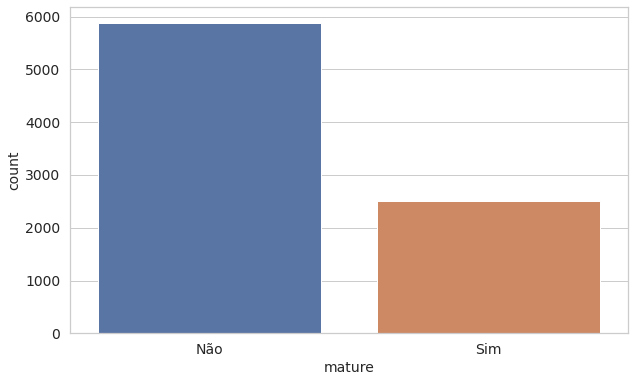

In [17]:
sns.countplot(data=data, x='mature')

#### Proporção de language

In [18]:
data.language.value_counts()

English                    3771
Spanish                     733
Portuguese                  583
Russian                     577
Korean                      520
German                      515
French                      468
Chinese                     205
Turkish                     198
Italian                     183
Polish                      133
Japanese                    119
Arabic                       65
Czech                        56
Hungarian                    55
Thai                         52
Finnish                      30
Swedish                      21
Danish                       19
Greek                        19
Other                        17
Dutch                        14
Bulgarian                    12
Romanian                      8
Slovak                        8
Norwegian                     6
Chinese (Hong Kong SAR)       1
Indonesian                    1
Name: language, dtype: int64

In [19]:
data.language.value_counts() / data.shape[0]

English                    0.449517
Spanish                    0.087376
Portuguese                 0.069496
Russian                    0.068781
Korean                     0.061986
German                     0.061390
French                     0.055787
Chinese                    0.024437
Turkish                    0.023602
Italian                    0.021814
Polish                     0.015854
Japanese                   0.014185
Arabic                     0.007748
Czech                      0.006675
Hungarian                  0.006556
Thai                       0.006199
Finnish                    0.003576
Swedish                    0.002503
Danish                     0.002265
Greek                      0.002265
Other                      0.002026
Dutch                      0.001669
Bulgarian                  0.001430
Romanian                   0.000954
Slovak                     0.000954
Norwegian                  0.000715
Chinese (Hong Kong SAR)    0.000119
Indonesian                 0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

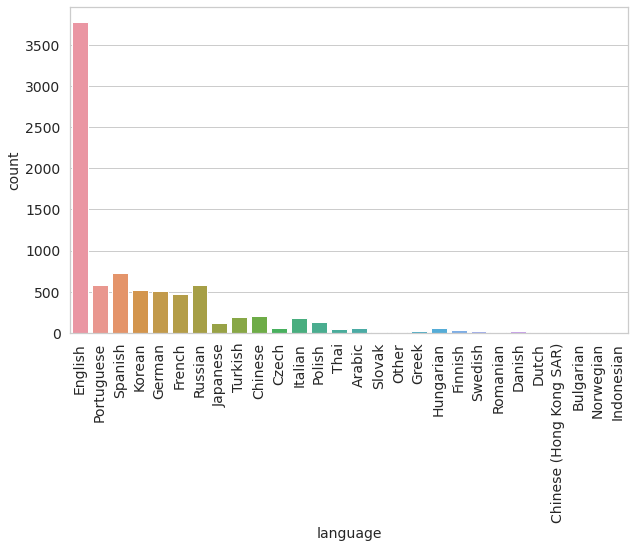

In [20]:
sns.countplot(data=data, x='language')
plt.xticks(rotation=90)

#### Proporção de conteúdo maduro por país

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

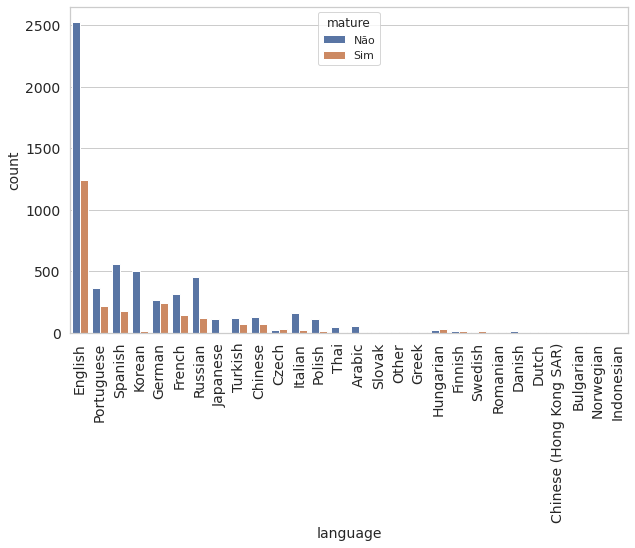

In [21]:
sns.countplot(data=data, x='language', hue='mature')
plt.xticks(rotation=90)

In [22]:
data.corr()

,topCount,watchTime,streamTime,peakViewers,averageViewers,followers,followersGained,viewsGained
topCount,1.000000,-0.391618,-0.196341,-0.295969,-0.334843,-0.345126,-0.333321,-0.272552
watchTime,-0.391618,1.000000,0.166501,0.549590,0.616460,0.628292,0.599840,0.596320
streamTime,-0.196341,0.166501,1.000000,-0.056108,-0.125773,-0.011021,-0.059033,0.093518
peakViewers,-0.295969,0.549590,-0.056108,1.000000,0.627268,0.522904,0.530450,0.334806
averageViewers,-0.334843,0.616460,-0.125773,0.627268,1.000000,0.615857,0.635304,0.392805
followers,-0.345126,0.628292,-0.011021,0.522904,0.615857,1.000000,0.726067,0.349148
followersGained,-0.333321,0.599840,-0.059033,0.530450,0.635304,0.726067,1.000000,0.345068
viewsGained,-0.272552,0.596320,0.093518,0.334806,0.392805,0.349148,0.345068,1.000000


### Preprocessamento de dados

#### Convertendo o Mature em Dummy Variable

In [23]:
data_pre = data.copy()
data_pre.head()

,topCount,screenName,watchTime,streamTime,peakViewers,averageViewers,followers,followersGained,viewsGained,mature,language,firstCategory,secondCategory,thirdCategory
0,1,xQcOW,7333609065,215670,222720,32913,3691010,2051895,109735389,Não,English,Just Chatting,Among Us,Overwatch
1,2,Gaules,6314532585,515595,387315,12254,1966465,1141123,112807468,Sim,Portuguese,Counter-Strike: Global Offensive,Among Us,PLAYERUNKNOWN
2,3,summit1g,6235007490,216000,310998,25931,5374710,1402547,91501875,Não,English,Escape From Tarkov,Sea of Thieves,Grand Theft Auto V
3,5,NICKMERCS,3853252845,131880,163241,29183,4415637,1337535,49164651,Não,English,Call Of Duty: Modern Warfare,Fortnite,Halo: The Master Chief Collection
4,6,Fextralife,3644124975,161595,68795,19768,533400,437036,684835748,Não,English,VALORANT,The Elder Scrolls Online,Genshin Impact


In [24]:
selecao = data_pre.mature == 'Não'
data_pre.loc[selecao, 'mature'] = 0
data_pre.head()

,topCount,screenName,watchTime,streamTime,peakViewers,averageViewers,followers,followersGained,viewsGained,mature,language,firstCategory,secondCategory,thirdCategory
0,1,xQcOW,7333609065,215670,222720,32913,3691010,2051895,109735389,0,English,Just Chatting,Among Us,Overwatch
1,2,Gaules,6314532585,515595,387315,12254,1966465,1141123,112807468,Sim,Portuguese,Counter-Strike: Global Offensive,Among Us,PLAYERUNKNOWN
2,3,summit1g,6235007490,216000,310998,25931,5374710,1402547,91501875,0,English,Escape From Tarkov,Sea of Thieves,Grand Theft Auto V
3,5,NICKMERCS,3853252845,131880,163241,29183,4415637,1337535,49164651,0,English,Call Of Duty: Modern Warfare,Fortnite,Halo: The Master Chief Collection
4,6,Fextralife,3644124975,161595,68795,19768,533400,437036,684835748,0,English,VALORANT,The Elder Scrolls Online,Genshin Impact


In [25]:
data_pre.loc[~selecao, 'mature'] = 1
data_pre.head()

,topCount,screenName,watchTime,streamTime,peakViewers,averageViewers,followers,followersGained,viewsGained,mature,language,firstCategory,secondCategory,thirdCategory
0,1,xQcOW,7333609065,215670,222720,32913,3691010,2051895,109735389,0,English,Just Chatting,Among Us,Overwatch
1,2,Gaules,6314532585,515595,387315,12254,1966465,1141123,112807468,1,Portuguese,Counter-Strike: Global Offensive,Among Us,PLAYERUNKNOWN
2,3,summit1g,6235007490,216000,310998,25931,5374710,1402547,91501875,0,English,Escape From Tarkov,Sea of Thieves,Grand Theft Auto V
3,5,NICKMERCS,3853252845,131880,163241,29183,4415637,1337535,49164651,0,English,Call Of Duty: Modern Warfare,Fortnite,Halo: The Master Chief Collection
4,6,Fextralife,3644124975,161595,68795,19768,533400,437036,684835748,0,English,VALORANT,The Elder Scrolls Online,Genshin Impact


In [26]:
data_pre.mature.unique()

array([0, 1], dtype=object)

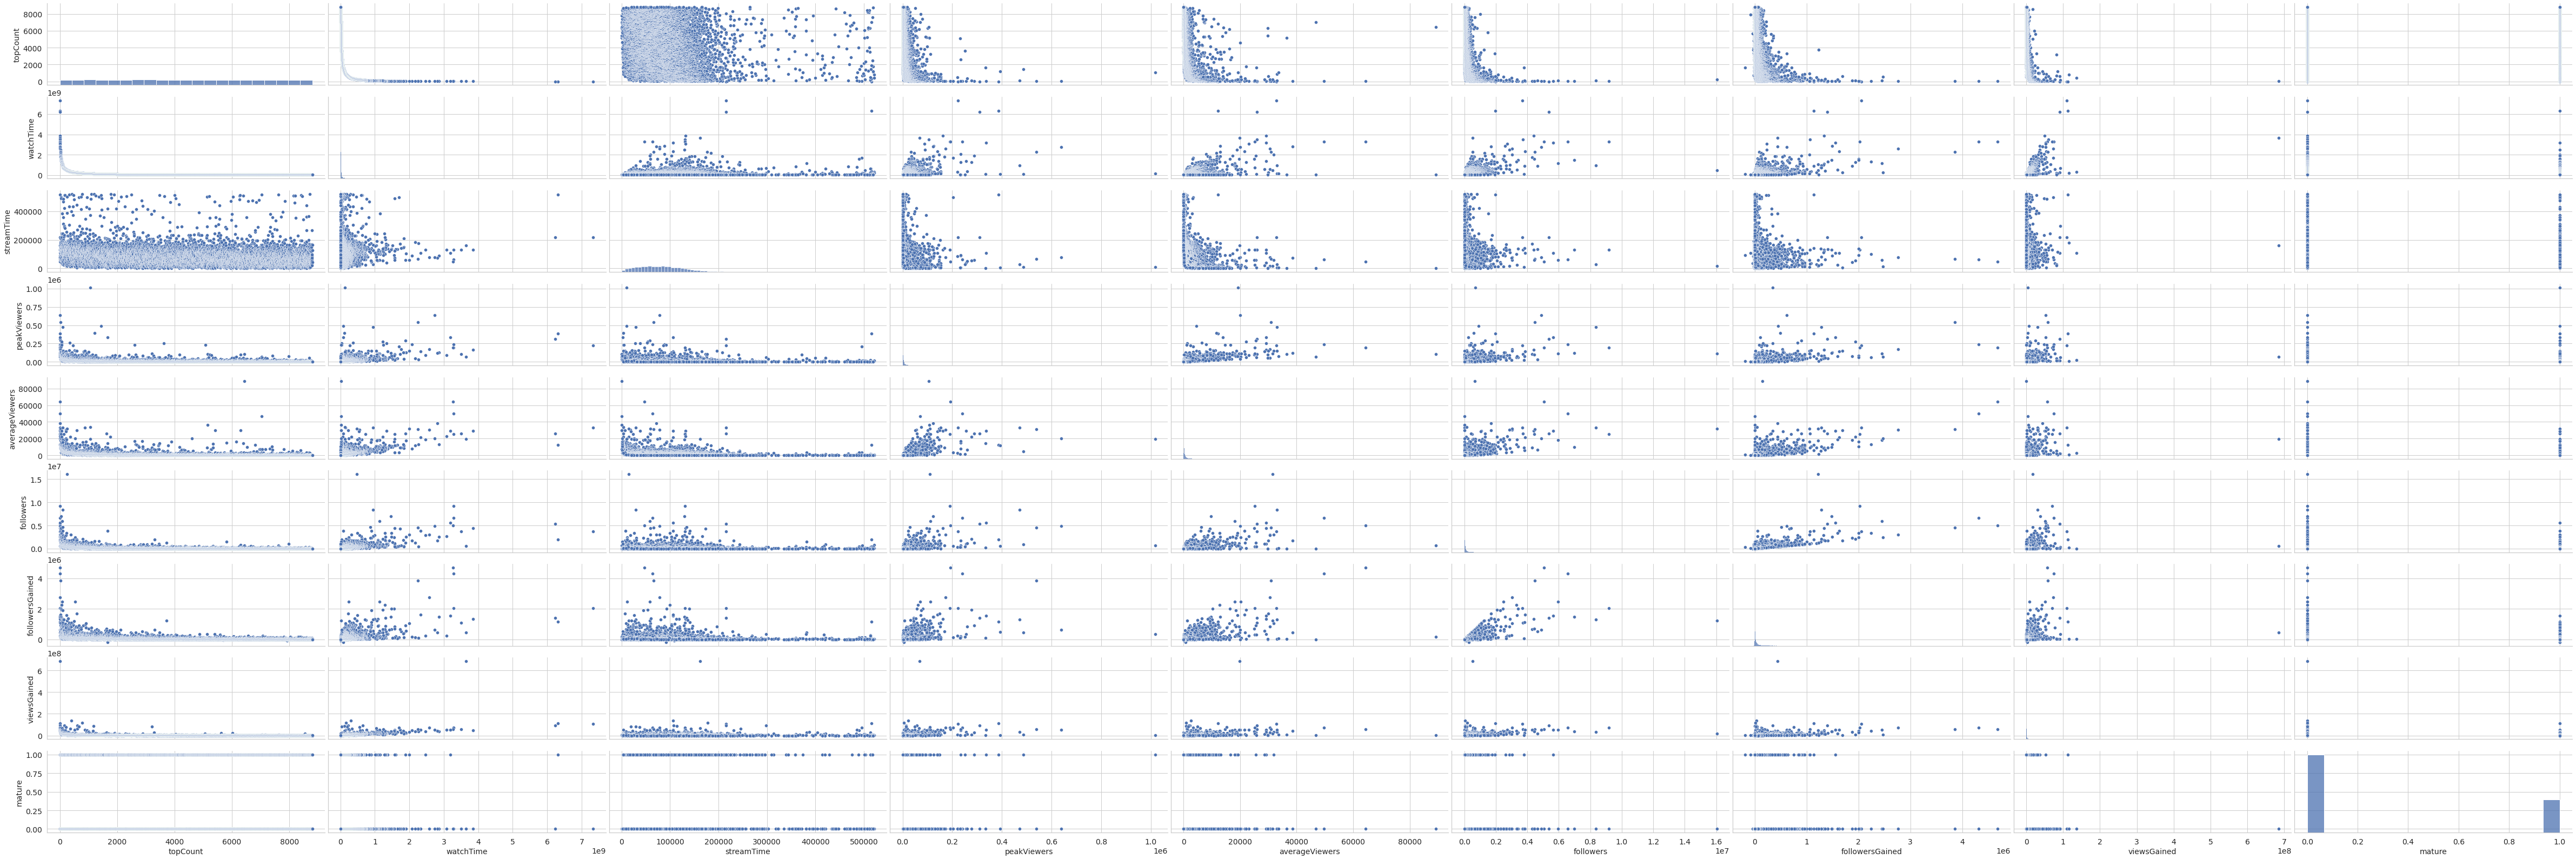

In [27]:
sns.pairplot(data=data_pre, aspect=3)

### K-Nearest Neighbors

#### Data sampling - Amostrando o conjunto de dados

#### Separando as variáveis independentes e dependente (classe)

In [28]:
X = data_pre.drop(axis=1, labels=['mature'])

In [29]:
X.head()

,topCount,screenName,watchTime,streamTime,peakViewers,averageViewers,followers,followersGained,viewsGained,language,firstCategory,secondCategory,thirdCategory
0,1,xQcOW,7333609065,215670,222720,32913,3691010,2051895,109735389,English,Just Chatting,Among Us,Overwatch
1,2,Gaules,6314532585,515595,387315,12254,1966465,1141123,112807468,Portuguese,Counter-Strike: Global Offensive,Among Us,PLAYERUNKNOWN
2,3,summit1g,6235007490,216000,310998,25931,5374710,1402547,91501875,English,Escape From Tarkov,Sea of Thieves,Grand Theft Auto V
3,5,NICKMERCS,3853252845,131880,163241,29183,4415637,1337535,49164651,English,Call Of Duty: Modern Warfare,Fortnite,Halo: The Master Chief Collection
4,6,Fextralife,3644124975,161595,68795,19768,533400,437036,684835748,English,VALORANT,The Elder Scrolls Online,Genshin Impact


In [30]:
data_pre.head()

,topCount,screenName,watchTime,streamTime,peakViewers,averageViewers,followers,followersGained,viewsGained,mature,language,firstCategory,secondCategory,thirdCategory
0,1,xQcOW,7333609065,215670,222720,32913,3691010,2051895,109735389,0,English,Just Chatting,Among Us,Overwatch
1,2,Gaules,6314532585,515595,387315,12254,1966465,1141123,112807468,1,Portuguese,Counter-Strike: Global Offensive,Among Us,PLAYERUNKNOWN
2,3,summit1g,6235007490,216000,310998,25931,5374710,1402547,91501875,0,English,Escape From Tarkov,Sea of Thieves,Grand Theft Auto V
3,5,NICKMERCS,3853252845,131880,163241,29183,4415637,1337535,49164651,0,English,Call Of Duty: Modern Warfare,Fortnite,Halo: The Master Chief Collection
4,6,Fextralife,3644124975,161595,68795,19768,533400,437036,684835748,0,English,VALORANT,The Elder Scrolls Online,Genshin Impact


In [31]:
y = data_pre.mature  # nossas classes

In [32]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: mature, dtype: object